In [1]:
# Importamos librerías de análisis de datos
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
%matplotlib inline
from pywaffle import Waffle

In [2]:
# Cargamos el dataframe
df = pd.read_csv('train.csv', index_col='id', parse_dates=['fecha'])

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 240000 entries, 254099 to 121958
Data columns (total 22 columns):
titulo                        234613 non-null object
descripcion                   238381 non-null object
tipodepropiedad               239954 non-null object
direccion                     186928 non-null object
ciudad                        239628 non-null object
provincia                     239845 non-null object
antiguedad                    196445 non-null float64
habitaciones                  217529 non-null float64
garages                       202235 non-null float64
banos                         213779 non-null float64
metroscubiertos               222600 non-null float64
metrostotales                 188533 non-null float64
idzona                        211379 non-null float64
lat                           116512 non-null float64
lng                           116512 non-null float64
fecha                         240000 non-null datetime64[ns]
gimnasio           

In [4]:
df = df[['tipodepropiedad','fecha','lat','lng','banos','antiguedad','metrostotales','ciudad','idzona','precio']]

In [5]:
def precio_por_metros_totales(precio, metros):
        return precio/metros

df['precioXmetro'] = df.apply(lambda x: precio_por_metros_totales(x['precio'], x['metrostotales']), axis=1)

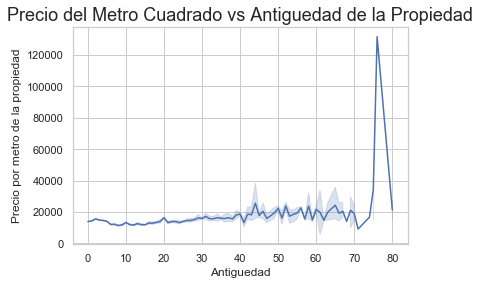

In [6]:
g = sns.lineplot(x=df.antiguedad, y=df.precioXmetro,)
g.set_title("Precio del Metro Cuadrado vs Antiguedad de la Propiedad", fontsize=18)
g.set_xlabel("Antiguedad", fontsize=12)
g.set_ylabel("Precio por metro de la propiedad", fontsize=12);

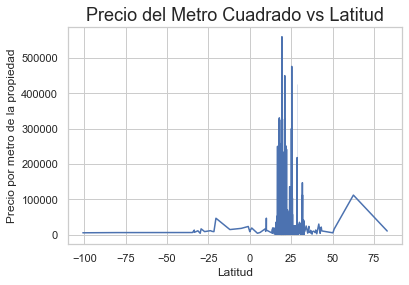

In [7]:
g = sns.lineplot(x=df.lat, y=df.precioXmetro,)
g.set_title("Precio del Metro Cuadrado vs Latitud", fontsize=18)
g.set_xlabel("Latitud", fontsize=12)
g.set_ylabel("Precio por metro de la propiedad", fontsize=12);

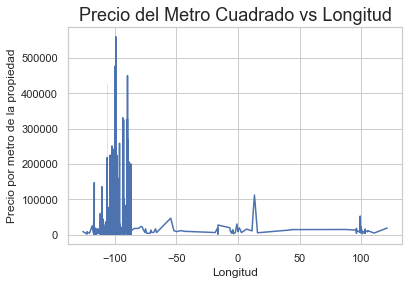

In [8]:
g = sns.lineplot(x=df.lng, y=df.precioXmetro,)
g.set_title("Precio del Metro Cuadrado vs Longitud", fontsize=18)
g.set_xlabel("Longitud", fontsize=12)
g.set_ylabel("Precio por metro de la propiedad", fontsize=12);

In [9]:
df['banos']

id
254099    2.0
53461     2.0
247984    2.0
209067    1.0
185997    1.0
         ... 
119879    1.0
259178    3.0
131932    2.0
146867    4.0
121958    2.0
Name: banos, Length: 240000, dtype: float64

In [10]:
porbano = df.groupby('banos').agg({'precioXmetro': 'mean'})
porbano

,precioXmetro
banos,
1.0,10399.823672
2.0,14720.506293
3.0,16390.989688
4.0,17349.657940


In [11]:
df['anio'] = pd.DatetimeIndex(df['fecha']).year
unb = df[(df['banos'] == 1) & (df['tipodepropiedad'] == 'Casa')]
dosb = df[(df['banos'] == 2) & (df['tipodepropiedad'] == 'Casa')]
tresb = df[(df['banos'] == 3) & (df['tipodepropiedad'] == 'Casa')]
cuatrob = df[(df['banos'] == 4) & (df['tipodepropiedad'] == 'Casa')]
unb = unb.groupby('anio').agg({'precioXmetro': 'mean'})
dosb = dosb.groupby('anio').agg({'precioXmetro': 'mean'})
tresb = tresb.groupby('anio').agg({'precioXmetro': 'mean'})
cuatrob = cuatrob.groupby('anio').agg({'precioXmetro': 'mean'})

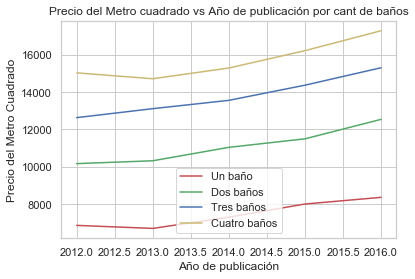

In [13]:
fig, ax = plt.subplots()

ax.plot(unb.index, unb.precioXmetro, 'r', label='Un baño')
ax.plot(dosb.index, dosb.precioXmetro, 'g', label="Dos baños")
ax.plot(tresb.index, tresb.precioXmetro, 'b',label="Tres baños")
ax.plot(cuatrob.index, cuatrob.precioXmetro, 'y', label="Cuatro baños")
legend = ax.legend(loc='upper left', shadow=True, fontsize='medium')
ax.legend(['Un baño', 'Dos baños', 'Tres baños', 'Cuatro baños'])
plt.xlabel('Año de publicación')
plt.ylabel('Precio del Metro Cuadrado')
plt.title('Precio del Metro cuadrado vs Año de publicación por cant de baños')
plt.show()

#El comportamiento del precio del metro cuadrado promedio por anio es similar para distintas cantidades, 
#pero es mayor mientras mas banos se tenga


In [79]:
df['grupoXantiguedad'] = pd.cut(df['antiguedad'], [0, 10,20,30,40,80],right=False)

precioMetroXantiguedad = df.groupby('grupoXantiguedad').agg({'precioXmetro':'mean'})
precioMetroXantiguedad.reset_index(inplace=True)
precioMetroXantiguedad

,grupoXantiguedad,precioXmetro
0,"[0, 10)",14052.176453
1,"[10, 20)",13103.240962
2,"[20, 30)",16003.666009
3,"[30, 40)",15986.264669
4,"[40, 80)",20155.550453


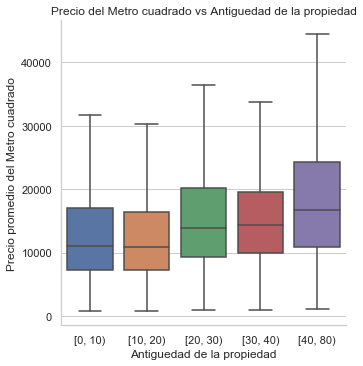

In [80]:
sns.catplot(x='grupoXantiguedad', y="precioXmetro", kind="box", data=df,showfliers=False)
plt.title('Precio del Metro cuadrado vs Antiguedad de la propiedad')
plt.xlabel('Antiguedad de la propiedad')
plt.ylabel('Precio promedio del Metro cuadrado')
plt.show()

In [44]:
soloApartamentos = df[df.tipodepropiedad == "Edificio"]
soloApartamentos.shape
precioMetroXciudad = soloApartamentos.groupby('ciudad').agg({'precioXmetro':'mean'})

In [45]:
precioMetroXciudad.nlargest(10,'precioXmetro')

,precioXmetro
ciudad,
San Cristóbal de las Casas,55555.555556
Zacatecas,51834.307992
Villahermosa,48947.273384
Tuxtla Gutiérrez,44575.001206
Minatitlán,40254.237288
Mazamitla,39344.262295
San Martín Texmelucan,37500.000000
Tultepec,36809.815951
Benito Juárez,35635.010138
